# Linear classifier: Steepest descend algorithm and Perceptron
Our model describes a linear classifier that divides the coordinate plane into two halves,
the line in the example is y=x.
We want to learn a parameter vector such that our model make the right prediction.
This model is called a linear perceptron.
The cost function minimize the distance in the two norm.

In [1]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot

Let's first define the activation function that we will use in our linear classifier
$$
f(t) = \frac{1-e^{-t}}{1+e^{-t}}
$$

In [2]:
def activation(t): 
    return (1-np.exp(-t))/(1+np.exp(-t))

Then, we can define how a single neuron works.
$$
neuron = f(\textbf{w}^T\textbf{x}+b)
$$

In [3]:
def neuron(w, b, x):
    return activation(np.inner(w,x)+b)

Define some training samples with the labels. After that, we will generate a larger training data with 2 features and 100 samples.

In [4]:
#Train the neuron with some good data
data = np.array([
    [[1,1.5],+1],
    [[3,4],+1],
    [[4,3],-1],
    [[1.5,1],-1]], dtype=object)
print('first data', data[0,0], 'Label',data[0,1])
print('second data', data[2,0],  'Label',data[2,1])
dataset = np.random.randn(100,2) #random distribution of normal distributed points

first data [1, 1.5] Label 1
second data [4, 3] Label -1


Define the cost function (also called objective or loss function). The parameter theta passed as input is a vector with this shape
$$
\theta = \begin{bmatrix}
w_0 \\
w_1 \\
\beta
\end{bmatrix}
$$
So, it contains the parameters that should be learned. The loss function is just 
$$
\frac{1}{2}\sum_{k=1}^{n}(f(\textbf{w}^T\textbf{x}+b) - y_k)^2
$$

In [5]:
def cost(theta):
    w=theta[0:2]
    b=theta[2]
    c=0
    for k in range(len(data)):
        #error between the computed output and the real output
        c +=(neuron(w,b,data[k,0])-data[k,1])**2
    return c/2

Our aim now is to find the minimum of our cost function. We will use the package scipy.optimize, which contains a lot of optimization algorithms, most of them in the class of line search algorithm.

So, we will pass the loss function that we want to minimize and the initial point. The starting point is a difficult choice because, according to the initial point, the behavior will change and also the solution will change.

Let's define some different starting points and let's see the solutions.

In [6]:
x0 = np.array([[1.,1.,1.], 
               [0.5,1.,0.5], 
               [1.,0.1,1.5],
               [2.5,0.5,1.5]])

for i in range(x0.shape[0]):
    opt = scipy.optimize.minimize(cost, x0[i])
    print(f'sol {i+1}: {opt.x}')
    print(f'msg {i+1}: {opt.message}\n')

sol 1: [-12.60708025  13.24896931  -0.81399506]
msg 1: Optimization terminated successfully.

sol 2: [-13.4219265   13.61965537  -0.03220813]
msg 2: Optimization terminated successfully.

sol 3: [-13.08489173  14.94625148  -2.60017078]
msg 3: Optimization terminated successfully.

sol 4: [-13.64207738  14.52635829  -0.79216869]
msg 4: Optimization terminated successfully.



As we can see, changing the input will change the solution and so, we are never sure that we will reach the same solution. 

Now, we can define our neural model. In fact, after computing the parameters, we can use them to compute the solution by the model. 

In [7]:
def neuronopt(w, b, x): 
    return neuron(w, b, x)

In [8]:
x0 = np.array([1.,1.,1.])
opt = scipy.optimize.minimize(cost, x0)
print(f'model output: {neuronopt(opt.x[0:2], opt.x[2], [4,3])}')

model output: -0.9999796467737655


In [9]:
datatest1 = np.array([p for p in dataset if neuronopt(opt.x[0:2], opt.x[2], p)>0])
datatest2 = np.array([p for p in dataset if neuronopt(opt.x[0:2], opt.x[2], p)<=0])

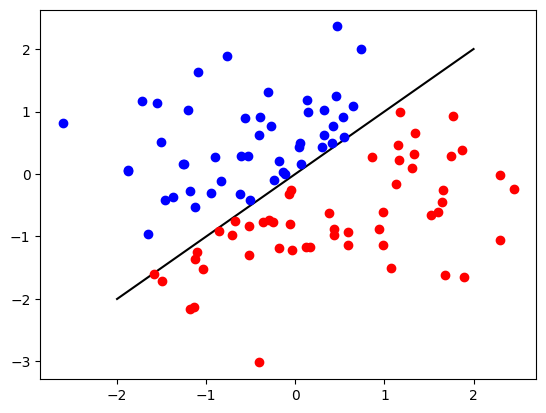

In [10]:
matplotlib.pyplot.plot([-2,2],[-2,2],'k', 
                       datatest1[::,0], datatest1[::,1],'bo',  
                       datatest2[::,0], datatest2[::,1],'ro');

Let's now implement the steepest-descend algorithm.
We define two functions: one for the computation of the gradient and one for the computation of the steepest-descend.

In [11]:
def grad_cost(theta, data):
    
    # Let's retrieve the actual weights
    w=theta[0:2]
    b=theta[2]
    
    # Define a zero vector for the weights
    gr=np.zeros((1,2))
    
    #b = 0
    (n,m)=data.shape
    
    # For each sample in our training set
    for k in range(n):
        # Compute the output by the model
        yk = neuron(w,b,data[k,0]) 
        
        # We compute the new weights using the computation of the derivative 
        gr += (yk-data[k,1])*np.asarray(data[k,0])*(1-yk**2)/2.0
        b += (yk-data[k,1])*(1-yk**2)/2.0
       
    # Store the new gradient     
    grt = np.array( [gr[0,0], gr[0,1], b])
   
    return grt

In [12]:
def steep_desc(theta, alpha, tol, data):
    # Copy the parameters from the vector theta
    w31 = np.copy(theta)
    
    # Fix the maximum number of iterations
    n_max_iter = 60000
    
    # Fix the initial error and the initial iteration
    err=1
    nit=0
    
    # Let's iterate until we don't reach the 
    # maximum number of iterations and the error
    # is greater than the tolerance
    while err > tol and nit < n_max_iter:
        # Increase the number of iterations
        nit=nit+1
        
        # Compute the gradient of the cost function
        grad = grad_cost(w31, data)
        
        # Update the weights by subtracting the actual
        # gradient multiplied by the learning rate
        w31 = w31 - alpha*grad
        
        # Compute the actual error 
        err =  np.linalg.norm(np.abs(grad))
        
    print(f'\tsol: {w31}')
    print(f'\terror: {err}')
    print(f'\tn_iter: {nit}')

    return w31  

Let's compare the solution both with the scipy routine and with the implemented method. Changing the value of alpha (the learning rate) the model will converge faster or slower.

In [13]:
x0 = np.array([-10.,10.,1])
opt = scipy.optimize.minimize(cost,x0)
print(f'scipy output: {opt.message}')
print(f'\tsol: {opt.x}')
print(f'\tcost function: {cost(opt.x)}')
print(f'\tn_iter: {opt.nit}')
print(f'\tn_func_eval: {opt.fun}')

print(f'\nimplemented method output')
optw = steep_desc(x0, 0.5, 5e-5, data)
print(f'\tcost function: {cost(optw)}')

scipy output: Optimization terminated successfully.
	sol: [-19.27193536  17.19889728   0.1510764 ]
	cost function: 3.162494562218585e-06
	n_iter: 23
	n_func_eval: 3.162494562218585e-06

implemented method output
	sol: [-1.09305199e+01  1.09305493e+01 -4.13658262e-10]
	error: 4.99995211703111e-05
	n_iter: 34358
	cost function: 7.10116388117625e-05


Let's define the new linear model with the weights learned by the implemented model.

In [14]:
def neuronoptw(w, b, x): 
    return neuron(w, b, x)

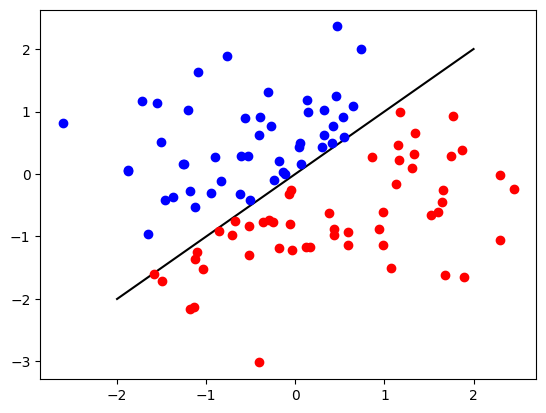

In [15]:
datatest1w = np.array([p for p in dataset if neuronoptw(optw[0:2], optw[2],p)>0])
datatest2w = np.array([p for p in dataset if neuronoptw(optw[0:2], optw[2],p)<0])
matplotlib.pyplot.plot([-2,2],[-2,2],'k', 
                       datatest1w[::,0], datatest1w[::,1],'bo',  
                       datatest2w[::,0], datatest2w[::,1],'ro');